In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.stores.mysql import Mysql
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [2]:
ticker = 'GME'

mysql = Mysql()

In [4]:
mysql.update_candles(ticker, 60)

,t,o,l,h,c,v,r
t,,,,,,,
0,2020-03-26 15:00:00,4.53,4.710,4.620,4.600,0.000000,850676
1,2020-03-26 16:00:00,4.47,4.661,4.540,4.630,-0.010403,502314
2,2020-03-26 17:00:00,4.36,4.590,4.455,4.540,-0.015233,406240
3,2020-03-26 18:00:00,4.40,4.510,4.490,4.460,-0.017429,433658
4,2020-03-26 19:00:00,4.36,4.510,4.400,4.490,0.000000,1405806
...,...,...,...,...,...,...,...
2,2021-03-26 11:00:00,197.00,202.500,197.350,199.520,-0.011472,179375
3,2021-03-26 12:00:00,193.60,199.500,198.240,197.480,-0.014815,302297
4,2021-03-26 13:00:00,184.31,210.400,209.590,198.140,0.054637,5798803


In [5]:
data = mysql.get_closes_by_symbol(ticker)

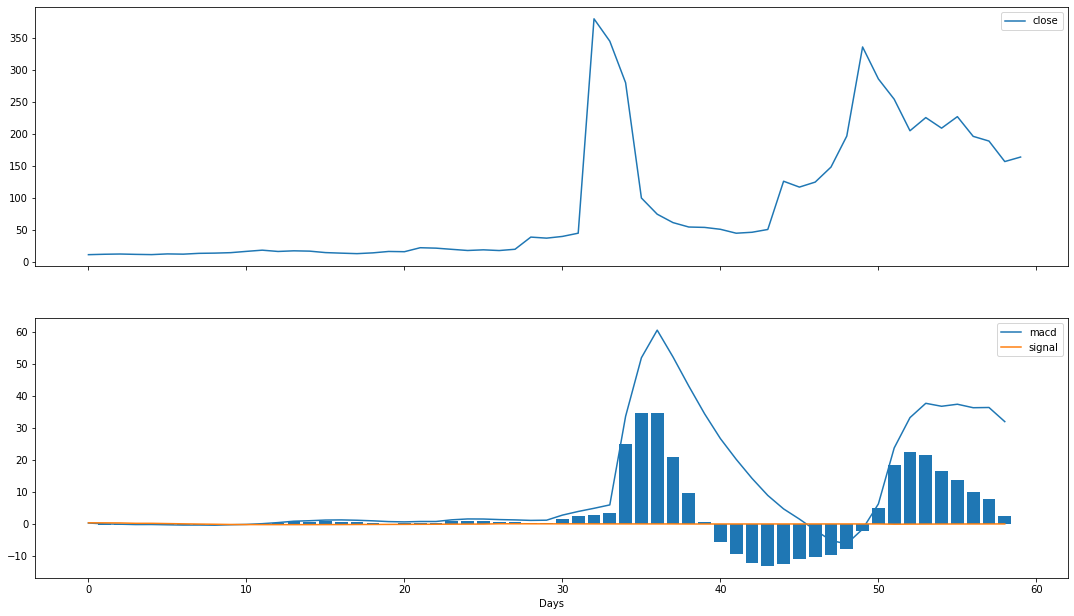

In [7]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

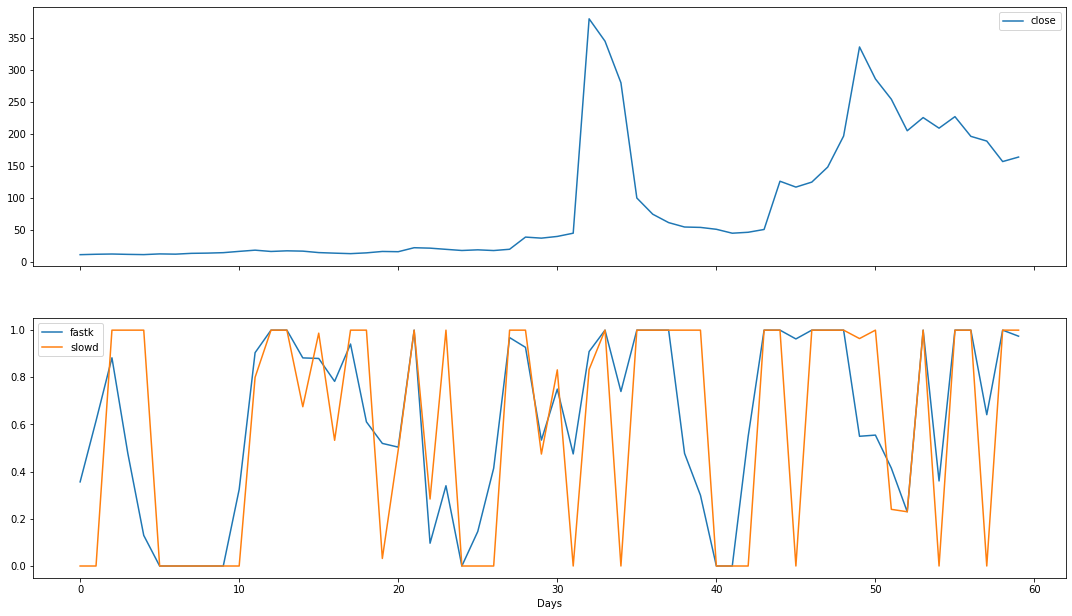

In [8]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)